In [4]:
import axelrod as axl

In [285]:
import pandas as pd

from keras.models import load_model

In [286]:
import numpy as np

In [287]:
import time

In [288]:
import matplotlib.pyplot as plt

**Padded classification**

In [289]:
model = load_model('output_basic_tournament/basic/output_padded/model-over-time.h5')

In [290]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 204, 1)            3         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               81600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 81,804
Trainable params: 81,804
Non-trainable params: 0
_________________________________________________________________


In [291]:
input_lenght = 204

In [292]:
test_input  = np.array([2, 2, 2, 2, 2, 2, 2, 2, 2] + [0 for _ in range(input_lenght - 9)] )
test_input = test_input.reshape((1, input_lenght))

In [293]:

model.predict(test_input)

array([[0.06191806]], dtype=float32)

In [294]:
axl.Action(round(output.max()))

D

In [5]:
class LSTMPlayer(axl.Player):
    name = "The LSTM homie"
    classifier = {
        "memory_depth": float("inf"),
        "stochastic": True,
        "inspects_source": False,
        "manipulates_source": False,
        "manipulates_state": False,
    }

    def __init__(self, model, reshape_history_funct, opening_probability=0.70, input_length=False):
        self.model = model
        self.opening_probability = opening_probability
        self.reshape_history_function = reshape_history_funct
        if input_length:
            self.input_length = input_length
        super().__init__()
        classifier["memory_depth"] = input_length
        if opening_probability in [0, 1]:
            classifier["stochastic"] = False
        # TODO Overwrite instance memory depth to input length
        # TODO If opening_probability is 0 or 1 overwrite stochastic classifier to be False

    def strategy(self, opponent):
        if len(self.history) == 0:
            return random_choice(self.opening_probability)

        history = [action.value for action in opponent.history]
        
        start = time.time()
        reshape = self.reshape_history_function(history, self.input_length)
        print(f'reshape time:{time.time() - start}')
        
        start = time.time()
        prediction = self.model.predict([reshape])
        print(f'action time:{time.time() - start}')
    
        return axl.Action(round(prediction.max()))

    def __repr__(self):
        return self.name

In [276]:
def reshape_history_padded_model(history, input_length):

    length_history = len(history)
    history = np.where(np.array(history) == 0, 2, history)
    
    inputs = np.pad(history, pad_width=(0, abs(length_history - input_length)),
                        mode='constant', constant_values=(0))
    
    return np.array(inputs).reshape(1, len(inputs))

**Tournament**

In [277]:
history = [0, 0, 0, 1]
input_length = 5

In [278]:
reshape_history_padded_model(history, input_length)

array([[2, 2, 2, 1, 0]])

In [279]:
player = LSTMPlayer(model, reshape_history_padded_model, input_length=204)

In [280]:
match = axl.Match([player, axl.Grudger()], turns=204)

In [281]:
match.play()

reshape time:0.00029206275939941406
action time:0.03820681571960449
reshape time:0.00013899803161621094
action time:0.017902851104736328
reshape time:0.00014209747314453125
action time:0.01566600799560547
reshape time:0.0001049041748046875
action time:0.014298200607299805
reshape time:0.00014591217041015625
action time:0.014181137084960938
reshape time:0.00011324882507324219
action time:0.014997005462646484
reshape time:0.00017189979553222656
action time:0.021986007690429688
reshape time:0.0001590251922607422
action time:0.013850212097167969
reshape time:0.0001609325408935547
action time:0.021880149841308594
reshape time:0.00017523765563964844
action time:0.02215719223022461
reshape time:0.00016379356384277344
action time:0.028316736221313477
reshape time:0.00014901161193847656
action time:0.015157938003540039
reshape time:0.00015020370483398438
action time:0.014178037643432617
reshape time:0.00015807151794433594
action time:0.022008180618286133
reshape time:0.0001628398895263672
actio

action time:0.01558685302734375
reshape time:0.0001442432403564453
action time:0.019031047821044922
reshape time:0.00017499923706054688
action time:0.014672994613647461
reshape time:0.0001747608184814453
action time:0.021845102310180664
reshape time:0.00017690658569335938
action time:0.01399087905883789
reshape time:0.000125885009765625
action time:0.013813972473144531
reshape time:0.00040602684020996094
action time:0.02152109146118164
reshape time:0.00012922286987304688
action time:0.014142990112304688
reshape time:0.000171661376953125
action time:0.014546871185302734
reshape time:0.0001308917999267578
action time:0.026647090911865234
reshape time:0.0001499652862548828
action time:0.02281785011291504
reshape time:0.00021576881408691406
action time:0.01429295539855957
reshape time:0.00030303001403808594
action time:0.024785995483398438
reshape time:0.00017976760864257812
action time:0.015873193740844727
reshape time:0.00017595291137695312
action time:0.02192211151123047
reshape time:0.

[(D, C),
 (C, D),
 (C, D),
 (C, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 (D, D),
 

In [234]:
player = LSTMPlayer(model, reshape_history_padded_model, input_length=204)

In [235]:
tournament = axl.Tournament(players=[player, axl.Grudger()], turns=10, repetitions=10)

In [236]:
results = tournament.play(progress_bar=False)

In [237]:
results.normalised_scores

[[1.1, 3.0, 3.0, 3.0, 1.1, 3.0, 3.0, 1.1, 1.1, 1.1],
 [2.1, 3.0, 3.0, 3.0, 2.1, 3.0, 3.0, 2.1, 2.1, 2.1]]

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


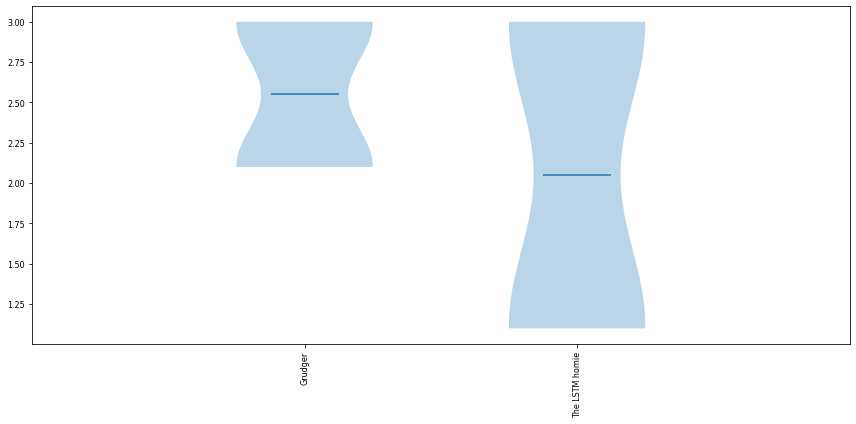

In [238]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

In [239]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]

In [240]:
len(strategies_tournament)

12

In [282]:
tournament = axl.Tournament(players=[axl.Defector(), axl.Cooperator(), player], turns=204, repetitions=4)

In [283]:
results = tournament.play(progress_bar=False)

reshape time:0.00017309188842773438
action time:0.02039813995361328
reshape time:0.0001220703125
action time:0.015194177627563477
reshape time:0.00010704994201660156
action time:0.022274017333984375
reshape time:0.00015997886657714844
action time:0.014075994491577148
reshape time:0.0001900196075439453
action time:0.015055656433105469
reshape time:0.0001480579376220703
action time:0.022761106491088867
reshape time:0.00017499923706054688
action time:0.021212100982666016
reshape time:0.00011420249938964844
action time:0.014081001281738281
reshape time:0.00017309188842773438
action time:0.014423847198486328
reshape time:0.00015592575073242188
action time:0.01412510871887207
reshape time:0.00017309188842773438
action time:0.014126062393188477
reshape time:0.00015306472778320312
action time:0.026909828186035156
reshape time:0.00019311904907226562
action time:0.014444112777709961
reshape time:0.00014901161193847656
action time:0.014313936233520508
reshape time:0.00016069412231445312
action ti

action time:0.017221689224243164
reshape time:0.0004889965057373047
action time:0.016649246215820312
reshape time:0.00011706352233886719
action time:0.013720989227294922
reshape time:0.0001690387725830078
action time:0.014004945755004883
reshape time:0.00018405914306640625
action time:0.021834135055541992
reshape time:0.0001819133758544922
action time:0.014161109924316406
reshape time:0.0001270771026611328
action time:0.013875961303710938
reshape time:0.0001220703125
action time:0.014032125473022461
reshape time:0.00017571449279785156
action time:0.021468162536621094
reshape time:0.0001289844512939453
action time:0.0137939453125
reshape time:0.00019025802612304688
action time:0.021678924560546875
reshape time:0.00012993812561035156
action time:0.014458894729614258
reshape time:0.00013017654418945312
action time:0.02288508415222168
reshape time:0.0004420280456542969
action time:0.017387866973876953
reshape time:0.00018405914306640625
action time:0.014909982681274414
reshape time:0.00017

action time:0.01971721649169922
reshape time:0.00015401840209960938
action time:0.02865004539489746
reshape time:0.0001537799835205078
action time:0.020520925521850586
reshape time:0.0001628398895263672
action time:0.01680922508239746
reshape time:0.00012493133544921875
action time:0.024806737899780273
reshape time:0.0001068115234375
action time:0.02417469024658203
reshape time:0.00010800361633300781
action time:0.021453142166137695
reshape time:0.00016832351684570312
action time:0.014275074005126953
reshape time:0.0001671314239501953
action time:0.022621870040893555
reshape time:0.00016927719116210938
action time:0.01489877700805664
reshape time:0.0001621246337890625
action time:0.026912212371826172
reshape time:0.0004258155822753906
action time:0.022998809814453125
reshape time:0.0006439685821533203
action time:0.039466142654418945
reshape time:0.00014209747314453125
action time:0.022282838821411133
reshape time:0.0006730556488037109
action time:0.03043079376220703
reshape time:0.000

action time:0.018746137619018555
reshape time:0.00020575523376464844
action time:0.025562286376953125
reshape time:0.00021028518676757812
action time:0.027613162994384766
reshape time:0.00016617774963378906
action time:0.022582054138183594
reshape time:0.00018358230590820312
action time:0.016875028610229492
reshape time:0.0002689361572265625
action time:0.02650308609008789
reshape time:0.0001239776611328125
action time:0.01475214958190918
reshape time:0.00017070770263671875
action time:0.027109146118164062
reshape time:0.00019097328186035156
action time:0.016184091567993164
reshape time:0.0001671314239501953
action time:0.017759323120117188
reshape time:0.00034499168395996094
action time:0.032196998596191406
reshape time:0.00016880035400390625
action time:0.01793503761291504
reshape time:0.000202178955078125
action time:0.024171113967895508
reshape time:0.0001862049102783203
action time:0.016488313674926758
reshape time:0.00021910667419433594
action time:0.017891883850097656
reshape ti

action time:0.02429795265197754
reshape time:0.00015687942504882812
action time:0.02154088020324707
reshape time:0.0001220703125
action time:0.021715879440307617
reshape time:0.00018906593322753906
action time:0.021610021591186523
reshape time:0.00012063980102539062
action time:0.013763666152954102
reshape time:0.00016188621520996094
action time:0.013896942138671875
reshape time:0.00016832351684570312
action time:0.014130830764770508
reshape time:0.0001671314239501953
action time:0.01377415657043457
reshape time:0.00017118453979492188
action time:0.02134990692138672
reshape time:0.00012111663818359375
action time:0.014143943786621094
reshape time:0.00012111663818359375
action time:0.013744115829467773
reshape time:0.00016808509826660156
action time:0.014151811599731445
reshape time:0.00018310546875
action time:0.022670984268188477
reshape time:0.00046896934509277344
action time:0.017558813095092773
reshape time:0.00019288063049316406
action time:0.022003889083862305
reshape time:0.0001

action time:0.02204298973083496
reshape time:0.00016617774963378906
action time:0.021055936813354492
reshape time:0.00010704994201660156
action time:0.01908087730407715
reshape time:0.0004153251647949219
action time:0.018260955810546875
reshape time:0.00012803077697753906
action time:0.027135848999023438
reshape time:0.00016117095947265625
action time:0.02869391441345215
reshape time:0.0003459453582763672
action time:0.019546031951904297
reshape time:0.00017595291137695312
action time:0.01942300796508789
reshape time:0.0001227855682373047
action time:0.023415088653564453
reshape time:0.0001571178436279297
action time:0.026824951171875
reshape time:0.00016307830810546875
action time:0.025027036666870117
reshape time:0.0001888275146484375
action time:0.028543949127197266
reshape time:0.0002460479736328125
action time:0.01943492889404297
reshape time:0.00021386146545410156
action time:0.027843713760375977
reshape time:0.00015306472778320312
action time:0.018803834915161133
reshape time:0.

action time:0.013931035995483398
reshape time:0.0001468658447265625
action time:0.01725602149963379
reshape time:0.00017523765563964844
action time:0.022710800170898438
reshape time:0.00013113021850585938
action time:0.013827085494995117
reshape time:0.0001862049102783203
action time:0.013644933700561523
reshape time:0.00018715858459472656
action time:0.021358966827392578
reshape time:0.00017595291137695312
action time:0.014062881469726562
reshape time:0.0004200935363769531
action time:0.021636009216308594
reshape time:0.0001862049102783203
action time:0.014214754104614258
reshape time:0.0001289844512939453
action time:0.02309393882751465
reshape time:0.00015997886657714844
action time:0.022808074951171875
reshape time:0.0001399517059326172
action time:0.014294862747192383
reshape time:0.00023174285888671875
action time:0.01783299446105957
reshape time:0.00018215179443359375
action time:0.014584064483642578
reshape time:0.00013065338134765625
action time:0.014436721801757812
reshape ti

action time:0.02508997917175293
reshape time:0.00012803077697753906
action time:0.015542984008789062
reshape time:0.00011801719665527344
action time:0.022281885147094727
reshape time:0.0001220703125
action time:0.013853073120117188
reshape time:0.00011897087097167969
action time:0.0218203067779541
reshape time:0.00011515617370605469
action time:0.014175891876220703
reshape time:0.00018525123596191406
action time:0.024844884872436523
reshape time:0.0001609325408935547
action time:0.014573097229003906
reshape time:0.0001728534698486328
action time:0.014769315719604492
reshape time:0.0001697540283203125
action time:0.014728069305419922
reshape time:0.00012993812561035156
action time:0.013814926147460938
reshape time:0.00016999244689941406
action time:0.014111042022705078
reshape time:0.00017595291137695312
action time:0.023579120635986328
reshape time:0.0001590251922607422
action time:0.01699995994567871
reshape time:0.00012183189392089844
action time:0.014232158660888672
reshape time:0.0

action time:0.019804716110229492
reshape time:0.00010633468627929688
action time:0.01380610466003418
reshape time:0.0001277923583984375
action time:0.014352083206176758
reshape time:0.00011682510375976562
action time:0.014152050018310547
reshape time:0.00011777877807617188
action time:0.014333963394165039
reshape time:0.00011682510375976562
action time:0.015046119689941406
reshape time:0.00011897087097167969
action time:0.014502763748168945
reshape time:0.00011706352233886719
action time:0.014713048934936523
reshape time:0.00013113021850585938
action time:0.01424407958984375
reshape time:0.00011706352233886719
action time:0.014612913131713867
reshape time:0.0001239776611328125
action time:0.014878988265991211
reshape time:0.00012803077697753906
action time:0.014258146286010742
reshape time:0.00012421607971191406
action time:0.02380514144897461
reshape time:0.00013685226440429688
action time:0.01346278190612793
reshape time:0.00011396408081054688
action time:0.0157620906829834
reshape t

action time:0.0176699161529541
reshape time:0.00012683868408203125
action time:0.026444196701049805
reshape time:0.000125885009765625
action time:0.014806985855102539
reshape time:0.00014209747314453125
action time:0.024276018142700195
reshape time:0.00013685226440429688
action time:0.014152050018310547
reshape time:0.00014019012451171875
action time:0.014482259750366211
reshape time:0.00014519691467285156
action time:0.024772167205810547
reshape time:0.00017714500427246094
action time:0.02283501625061035
reshape time:0.00017833709716796875
action time:0.013681888580322266
reshape time:0.00013208389282226562
action time:0.014377832412719727
reshape time:0.00013375282287597656
action time:0.024227142333984375
reshape time:0.0001499652862548828
action time:0.026944637298583984
reshape time:0.00011873245239257812
action time:0.021881818771362305
reshape time:0.00018405914306640625
action time:0.014046192169189453
reshape time:0.0001811981201171875
action time:0.013632059097290039
reshape 

action time:0.015170097351074219
reshape time:0.00013327598571777344
action time:0.019156932830810547
reshape time:0.00013494491577148438
action time:0.02530980110168457
reshape time:0.00012969970703125
action time:0.022753238677978516
reshape time:0.0001800060272216797
action time:0.014019012451171875
reshape time:0.00017523765563964844
action time:0.023034095764160156
reshape time:0.00017499923706054688
action time:0.014275789260864258
reshape time:0.00011491775512695312
action time:0.023057937622070312
reshape time:0.0001289844512939453
action time:0.02425098419189453
reshape time:0.00012612342834472656
action time:0.02208113670349121
reshape time:0.00014901161193847656
action time:0.02751326560974121
reshape time:0.0002002716064453125
action time:0.016087055206298828
reshape time:0.00012373924255371094
action time:0.014611244201660156
reshape time:0.00013017654418945312
action time:0.02449512481689453
reshape time:0.00013589859008789062
action time:0.014513969421386719
reshape time

action time:0.018950223922729492
reshape time:0.0001430511474609375
action time:0.01581716537475586
reshape time:0.00013899803161621094
action time:0.014794111251831055
reshape time:0.0001480579376220703
action time:0.015331745147705078
reshape time:0.00014901161193847656
action time:0.014809846878051758
reshape time:0.00015091896057128906
action time:0.015782833099365234
reshape time:0.00014734268188476562
action time:0.02417898178100586
reshape time:0.0001881122589111328
action time:0.014125823974609375
reshape time:0.00014781951904296875
action time:0.02327132225036621
reshape time:0.00014209747314453125
action time:0.013833045959472656
reshape time:0.00016307830810546875
action time:0.014381170272827148
reshape time:0.0001468658447265625
action time:0.025403738021850586
reshape time:0.00014901161193847656
action time:0.02754974365234375
reshape time:0.000186920166015625
action time:0.023967981338500977
reshape time:0.0001361370086669922
action time:0.013962984085083008
reshape time

action time:0.019730091094970703
reshape time:0.00012683868408203125
action time:0.025983095169067383
reshape time:0.00015592575073242188
action time:0.013947010040283203
reshape time:0.00015115737915039062
action time:0.014586925506591797
reshape time:0.00013685226440429688
action time:0.02634286880493164
reshape time:0.00014281272888183594
action time:0.015418052673339844
reshape time:0.0001430511474609375
action time:0.015091896057128906
reshape time:0.00015020370483398438
action time:0.014822721481323242
reshape time:0.00013327598571777344
action time:0.015208959579467773
reshape time:0.000141143798828125
action time:0.026183128356933594
reshape time:0.0001437664031982422
action time:0.014670848846435547
reshape time:0.00013375282287597656
action time:0.015170097351074219
reshape time:0.0001430511474609375
action time:0.020261764526367188
reshape time:0.00017714500427246094
action time:0.014744043350219727
reshape time:0.0001399517059326172
action time:0.025876998901367188
reshape 

action time:0.015870094299316406
reshape time:0.00018596649169921875
action time:0.02703118324279785
reshape time:0.0001220703125
action time:0.015565872192382812
reshape time:0.00013399124145507812
action time:0.024606943130493164
reshape time:0.00012803077697753906
action time:0.02516317367553711
reshape time:0.00012612342834472656
action time:0.015515804290771484
reshape time:0.0001289844512939453
action time:0.015043258666992188
reshape time:0.000141143798828125
action time:0.014703750610351562
reshape time:0.00012063980102539062
action time:0.015203237533569336
reshape time:0.0001220703125
action time:0.015106201171875
reshape time:0.0001270771026611328
action time:0.014940977096557617
reshape time:0.00012302398681640625
action time:0.01588273048400879
reshape time:0.00012612342834472656
action time:0.028588056564331055
reshape time:0.0001678466796875
action time:0.014279842376708984
reshape time:0.00011181831359863281
action time:0.024328947067260742
reshape time:0.00012087821960

action time:0.028130054473876953
reshape time:0.00011897087097167969
action time:0.02416205406188965
reshape time:0.00016999244689941406
action time:0.023185253143310547
reshape time:0.00012803077697753906
action time:0.014885187149047852
reshape time:0.0001308917999267578
action time:0.016389131546020508
reshape time:0.0001327991485595703
action time:0.014728069305419922
reshape time:0.00013399124145507812
action time:0.024921178817749023
reshape time:0.00013113021850585938
action time:0.024023056030273438
reshape time:0.00016880035400390625
action time:0.023274898529052734
reshape time:0.00014591217041015625
action time:0.022488117218017578
reshape time:0.0001678466796875
action time:0.024360179901123047
reshape time:0.00013065338134765625
action time:0.025763988494873047
reshape time:0.00016307830810546875
action time:0.015002965927124023
reshape time:0.00013518333435058594
action time:0.02524113655090332
reshape time:0.00014209747314453125
action time:0.02525186538696289
reshape ti

action time:0.02784895896911621
reshape time:0.0001499652862548828
action time:0.026685237884521484
reshape time:0.00015115737915039062
action time:0.014919042587280273
reshape time:0.00014472007751464844
action time:0.015284061431884766
reshape time:0.0001437664031982422
action time:0.016696691513061523
reshape time:0.0002448558807373047
action time:0.025894880294799805
reshape time:0.0001819133758544922
action time:0.024352073669433594
reshape time:0.0001480579376220703
action time:0.015024900436401367
reshape time:0.0001468658447265625
action time:0.015169143676757812
reshape time:0.00014209747314453125
action time:0.016416072845458984
reshape time:0.00014472007751464844
action time:0.015256881713867188
reshape time:0.00014519691467285156
action time:0.01712799072265625
reshape time:0.00014710426330566406
action time:0.028024911880493164
reshape time:0.00016689300537109375
action time:0.014712095260620117
reshape time:0.0001671314239501953
action time:0.015501022338867188
reshape ti

action time:0.016978025436401367
reshape time:0.00018405914306640625
action time:0.01858687400817871
reshape time:0.0001289844512939453
action time:0.02716994285583496
reshape time:0.00012111663818359375
action time:0.014806032180786133
reshape time:0.00012922286987304688
action time:0.015247821807861328
reshape time:0.000125885009765625
action time:0.02683401107788086
reshape time:0.0001227855682373047
action time:0.01569080352783203
reshape time:0.00013017654418945312
action time:0.025700807571411133
reshape time:0.00011801719665527344
action time:0.014800071716308594
reshape time:0.00012373924255371094
action time:0.014982938766479492
reshape time:0.0001270771026611328
action time:0.01530599594116211
reshape time:0.00013113021850585938
action time:0.01779937744140625
reshape time:0.00011277198791503906
action time:0.029031038284301758
reshape time:0.00011301040649414062
action time:0.02408313751220703
reshape time:0.00012612342834472656
action time:0.026484966278076172
reshape time:

action time:0.026051998138427734
reshape time:0.0004937648773193359
action time:0.025273799896240234
reshape time:0.00017523765563964844
action time:0.015212059020996094
reshape time:0.00013303756713867188
action time:0.026636123657226562
reshape time:0.0001480579376220703
action time:0.024352073669433594
reshape time:0.00016999244689941406
action time:0.014348030090332031
reshape time:0.00012612342834472656
action time:0.015334844589233398
reshape time:0.0001327991485595703
action time:0.027153968811035156
reshape time:0.00013494491577148438
action time:0.027193069458007812
reshape time:0.00014495849609375
action time:0.0158231258392334
reshape time:0.0001380443572998047
action time:0.027675151824951172
reshape time:0.00012683868408203125
action time:0.016398191452026367
reshape time:0.00013184547424316406
action time:0.026285171508789062
reshape time:0.00014209747314453125
action time:0.014962911605834961
reshape time:0.00013303756713867188
action time:0.0263669490814209
reshape time

action time:0.01828598976135254
reshape time:0.0001609325408935547
action time:0.02752995491027832
reshape time:0.0001399517059326172
action time:0.014764070510864258
reshape time:0.00014400482177734375
action time:0.014972209930419922
reshape time:0.000141143798828125
action time:0.02753472328186035
reshape time:0.00016307830810546875
action time:0.015170812606811523
reshape time:0.0001499652862548828
action time:0.01551675796508789
reshape time:0.00014901161193847656
action time:0.0273740291595459
reshape time:0.00015091896057128906
action time:0.015334844589233398
reshape time:0.00014901161193847656
action time:0.026713132858276367
reshape time:0.00015425682067871094
action time:0.01866006851196289
reshape time:0.0001380443572998047
action time:0.019868135452270508
reshape time:0.00014591217041015625
action time:0.01617884635925293
reshape time:0.0002048015594482422
action time:0.016401290893554688
reshape time:0.0001480579376220703
action time:0.02598094940185547
reshape time:0.000

action time:0.028593778610229492
reshape time:0.00015306472778320312
action time:0.017701148986816406
reshape time:0.0001583099365234375
action time:0.017306804656982422
reshape time:0.0001609325408935547
action time:0.01703810691833496
reshape time:0.00015616416931152344
action time:0.026123046875
reshape time:0.0001468658447265625
action time:0.016309022903442383
reshape time:0.00015497207641601562
action time:0.025650978088378906
reshape time:0.00014829635620117188
action time:0.015690088272094727
reshape time:0.00015282630920410156
action time:0.025592803955078125
reshape time:0.00018405914306640625
action time:0.01411581039428711
reshape time:0.0001518726348876953
action time:0.026117801666259766
reshape time:0.0001480579376220703
action time:0.028621196746826172
reshape time:0.00017905235290527344
action time:0.025699853897094727
reshape time:0.00015616416931152344
action time:0.01516866683959961
reshape time:0.00016164779663085938
action time:0.016727209091186523
reshape time:0.

action time:0.01933598518371582
reshape time:0.00013685226440429688
action time:0.027467012405395508
reshape time:0.00013208389282226562
action time:0.02527308464050293
reshape time:0.0001709461212158203
action time:0.014232158660888672
reshape time:0.00012493133544921875
action time:0.015745162963867188
reshape time:0.0001308917999267578
action time:0.015360116958618164
reshape time:0.00014209747314453125
action time:0.015776872634887695
reshape time:0.00013518333435058594
action time:0.027599811553955078
reshape time:0.0001468658447265625
action time:0.01584601402282715
reshape time:0.00013399124145507812
action time:0.015850067138671875
reshape time:0.00013208389282226562
action time:0.026253938674926758
reshape time:0.0001289844512939453
action time:0.01731109619140625
reshape time:0.00046515464782714844
action time:0.027734041213989258
reshape time:0.0001270771026611328
action time:0.014670133590698242
reshape time:0.0001327991485595703
action time:0.01498270034790039
reshape time

action time:0.028863191604614258
reshape time:0.00015997886657714844
action time:0.015719890594482422
reshape time:0.0001480579376220703
action time:0.01666092872619629
reshape time:0.00014901161193847656
action time:0.01642918586730957
reshape time:0.00015306472778320312
action time:0.016069889068603516
reshape time:0.00014400482177734375
action time:0.016590118408203125
reshape time:0.00014209747314453125
action time:0.015890836715698242
reshape time:0.00014829635620117188
action time:0.016089200973510742
reshape time:0.0001480579376220703
action time:0.01626110076904297
reshape time:0.00014519691467285156
action time:0.016100168228149414
reshape time:0.00015020370483398438
action time:0.02638077735900879
reshape time:0.00014901161193847656
action time:0.015522956848144531
reshape time:0.0001437664031982422
action time:0.020486116409301758
reshape time:0.00015592575073242188
action time:0.027997255325317383
reshape time:0.0001380443572998047
action time:0.025420188903808594
reshape t

action time:0.02241992950439453
reshape time:0.00017189979553222656
action time:0.016129016876220703
reshape time:0.00015401840209960938
action time:0.026436805725097656
reshape time:0.00017189979553222656
action time:0.015196800231933594
reshape time:0.00017499923706054688
action time:0.017207860946655273
reshape time:0.00015306472778320312
action time:0.02789783477783203
reshape time:0.0001552104949951172
action time:0.016115903854370117
reshape time:0.00015306472778320312
action time:0.016123294830322266
reshape time:0.00016427040100097656
action time:0.015900135040283203
reshape time:0.0001690387725830078
action time:0.01646900177001953
reshape time:0.00016689300537109375
action time:0.027697086334228516
reshape time:0.0001609325408935547
action time:0.022332191467285156
reshape time:0.00018095970153808594
action time:0.0172421932220459
reshape time:0.00016999244689941406
action time:0.029761075973510742
reshape time:0.0001399517059326172
action time:0.026982784271240234
reshape ti

action time:0.019122838973999023
reshape time:0.00015020370483398438
action time:0.028974056243896484
reshape time:0.00013494491577148438
action time:0.024605989456176758
reshape time:0.00016999244689941406
action time:0.015722036361694336
reshape time:0.00012803077697753906
action time:0.01642918586730957
reshape time:0.00013327598571777344
action time:0.026301145553588867
reshape time:0.0001342296600341797
action time:0.02558112144470215
reshape time:0.00012612342834472656
action time:0.02742290496826172
reshape time:0.00013113021850585938
action time:0.027933359146118164
reshape time:0.0001418590545654297
action time:0.019222021102905273
reshape time:0.00020885467529296875
action time:0.020219802856445312
reshape time:0.00012922286987304688
action time:0.02611684799194336
reshape time:0.00013899803161621094
action time:0.024341106414794922
reshape time:0.0001709461212158203
action time:0.014611959457397461
reshape time:0.00012993812561035156
action time:0.02000594139099121
reshape t

action time:0.016492128372192383
reshape time:0.00020194053649902344
action time:0.02937793731689453
reshape time:0.0001327991485595703
action time:0.014930963516235352
reshape time:0.00014209747314453125
action time:0.025923967361450195
reshape time:0.00013208389282226562
action time:0.014784097671508789
reshape time:0.00014519691467285156
action time:0.016328811645507812
reshape time:0.00013971328735351562
action time:0.01628708839416504
reshape time:0.00014019012451171875
action time:0.016200780868530273
reshape time:0.00014400482177734375
action time:0.01657390594482422
reshape time:0.0001418590545654297
action time:0.017249107360839844
reshape time:0.00015306472778320312
action time:0.02728414535522461
reshape time:0.0001418590545654297
action time:0.029711008071899414
reshape time:0.00013303756713867188
action time:0.01680302619934082
reshape time:0.0001480579376220703
action time:0.027271270751953125
reshape time:0.0001442432403564453
action time:0.015208959579467773
reshape tim

action time:0.028169870376586914
reshape time:0.00018906593322753906
action time:0.01844477653503418
reshape time:0.0002732276916503906
action time:0.0287628173828125
reshape time:0.00016379356384277344
action time:0.016273975372314453
reshape time:0.0001590251922607422
action time:0.016874074935913086
reshape time:0.00016498565673828125
action time:0.01694488525390625
reshape time:0.0001537799835205078
action time:0.016160011291503906
reshape time:0.00016307830810546875
action time:0.027840137481689453
reshape time:0.000164031982421875
action time:0.025354862213134766
reshape time:0.00015592575073242188
action time:0.014657020568847656
reshape time:0.00015497207641601562
action time:0.01580810546875
reshape time:0.0001647472381591797
action time:0.021600723266601562
reshape time:0.00022101402282714844
action time:0.01746988296508789
reshape time:0.0001621246337890625
action time:0.01672506332397461
reshape time:0.00015997886657714844
action time:0.02798008918762207
reshape time:0.0001

In [ ]:
results

In [ ]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

In [77]:
valid = pd.read_csv('output_basic_tournament/basic/output_lstm/validation_measures_run_100_2.csv',
                    index_col=0)

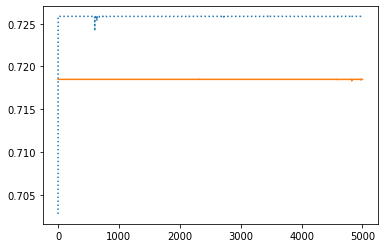

In [78]:
plt.plot(valid['acc'], ':')
plt.plot(valid['val_acc']);

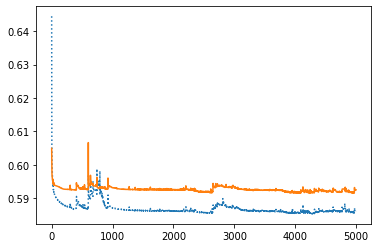

In [79]:
plt.plot(valid['loss'], ':')
plt.plot(valid['val_loss']);

**classification**

In [80]:
classification = load_model('output_basic_tournament/basic/output_lstm_classification/model-over-time.h5')

In [81]:
test_input  = np.array([0, 1, 2])
test_input = test_input.reshape((1, 3, 1))

In [82]:
classification.predict(test_input)[0][-1][0]

0.69983095

In [83]:
def reshape_history_lstm_model(history):
    return np.array(history).reshape(1, len(history), 1)

In [84]:
from axelrod.random_ import random_choice

C, D = axl.Action.C, axl.Action.D

class LSTMPlayer(axl.Player):
    name = "The LSTM homie"
    classifier = {
        "memory_depth": float("inf"),
        "stochastic": False,
        "inspects_source": False,
        "manipulates_source": False,
        "manipulates_state": False,
    }

    def __init__(self, model, reshape_history_funct, opening_probability=0.70):
        self.model = model
        self.opening_probability = opening_probability
        self.reshape_history_function = reshape_history_funct
        super().__init__()

    def strategy(self, opponent):
        if len(self.history) == 0:
            return random_choice(self.opening_probability)

        history = [action.value for action in opponent.history]

        prediction = self.model.predict(self.reshape_history_function(history))
    

        return axl.Action(round(prediction[0][-1][0]))

    def __repr__(self):
        return self.name

In [85]:
player = LSTMPlayer(classification , reshape_history_lstm_model)

In [86]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]

In [ ]:
tournament = axl.Tournament(players=strategies_tournament, turns=204, repetitions=10)

In [ ]:
results = tournament.play(progress_bar=False)

In [ ]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

In [90]:
match = axl.Match([player, axl.Grudger()], turns=5)

In [91]:
_ = match.play()

In [92]:
match.result

[(C, C), (C, C), (C, C), (C, C), (C, C)]

In [93]:
valid = pd.read_csv('output_basic_tournament/basic/output_lstm_classification/validation_measures_run_100_1.csv',
                    index_col=0)

In [94]:
valid.columns

Index(['acc', 'val_acc', 'loss', 'val_loss'], dtype='object')

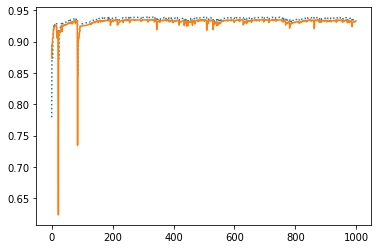

In [97]:
plt.plot(valid['acc'], ':')
plt.plot(valid['val_acc']);

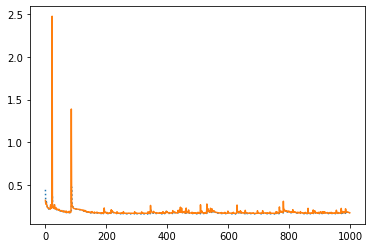

In [98]:
plt.plot(valid['loss'], ':')
plt.plot(valid['val_loss']);

In [99]:
classification = load_model('output_basic_tournament/basic/output_lstm_classification/final_lstm_model.h5')

In [100]:
player = LSTMPlayer(classification , reshape_history_lstm_model)

In [101]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]

In [105]:
tournament = axl.Tournament(players=strategies_tournament, turns=204, repetitions=10)

In [106]:
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


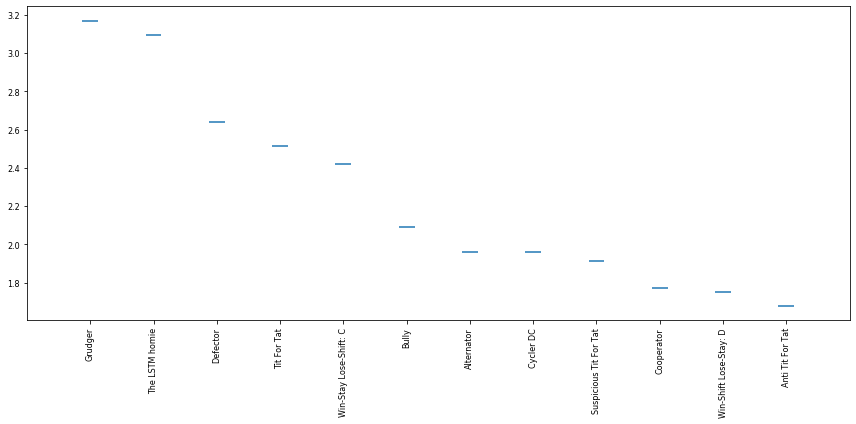

In [107]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()